In [153]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.optimize import root
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar
from scipy.optimize import brentq


# Definição dos parâmetros
k = 0.6
rho = 600.0
cp = 1200.0
T0 = 20.0+273
Tinf = 20.0+273
h = 15.0
L = 0.03
g = 50000.0
tf =500

alpha = k / (rho * cp)

H2 = h/k





C:\Users\User\AppData\Local\Temp\ipykernel_11148\705091104.py:22: RuntimeWarning: overflow encountered in double_scalars
  T[j, i] = T[j-1, i] + (1/alpha)*dt/(dx**2) * (T[j-1, i+1] - 2*T[j-1, i] + T[j-1, i-1]) + (g/k)*dt
C:\Users\User\AppData\Local\Temp\ipykernel_11148\705091104.py:22: RuntimeWarning: invalid value encountered in double_scalars
  T[j, i] = T[j-1, i] + (1/alpha)*dt/(dx**2) * (T[j-1, i+1] - 2*T[j-1, i] + T[j-1, i-1]) + (g/k)*dt


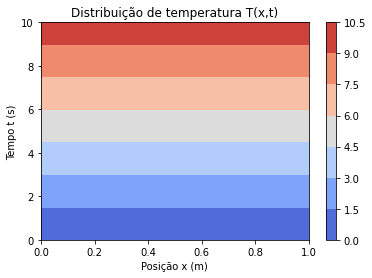

In [177]:
# Discretização do domínio
dx = 0.01  # Passo da grade no eixo x
dt = 0.001  # Passo da grade no eixo t
nx = int(L/dx) + 1  # Número de pontos no eixo x
nt = int(tf/dt) + 1  # Número de pontos no eixo t
x_vals = np.linspace(0, L, nx)  # Valores de x
t_vals = np.linspace(0, tf, nt)  # Valores de t

# Definição da matriz de temperatura
T = np.zeros((nt, nx))

# Condições iniciais
T[0, :] = T0

# Condições de contorno
T[:, 0] = Tinf
T[:, -1] = Tinf

# Loop para calcular as temperaturas em cada ponto da grade
for j in range(1, nt):
    for i in range(1, nx-1):
        T[j, i] = T[j-1, i] + (1/alpha)*dt/(dx**2) * (T[j-1, i+1] - 2*T[j-1, i] + T[j-1, i-1]) + (g/k)*dt

# Adicionar temperatura ambiente à matriz
T += Tinf

# Plot da solução
plt.figure()
X, T = np.meshgrid(x_vals, t_vals)
plt.contourf(X, T, T, cmap='coolwarm')
plt.colorbar()
plt.xlabel('Posição x (m)')
plt.ylabel('Tempo t (s)')
plt.title('Distribuição de temperatura T(x,t)')
plt.show()

In [43]:
def F(x):
    Fx = ((-g)/(2*k))*(x**2) + Tinf + ((g*L)/h)+((g*(L**2))/(2*k))
    return Fx

def Psi(x, lamb):
    Psi = np.cos(lamb*x)
    return Psi

def No1(lamb):
    No1 = (2*((lamb**2)+(H2**2)))/(L*((lamb**2)+(H2**2))+H2)
    return No1

def eqt(x):
    eqt = H2 - (x* np.tan(x*L))
    return eqt

def Gamma(t, lamb):
    gamma = np.exp((-alpha)*(lamb**2)*t)
    return gamma

In [45]:
Psi(2,2)
F(0)
Gamma(1,1)

0.9999991666670139

In [7]:
n0 = []
lamb = 0

for i in range(50):
    n0.append(No1(lamb))
    lamb +=1

In [100]:
n0

[0.0,
 28.55185015989036,
 56.98655117392295,
 85.18855065879147,
 113.04544426859597,
 140.4494382022472,
 167.29868391701987,
 193.4984520123839,
 218.96211955331728,
 243.611953226505,
 267.379679144385,
 290.20683832840865,
 312.04493447056376,
 332.8553871364195,
 352.6093088857546,
 371.28712871287127,
 388.8780867198133,
 405.3796260969096,
 420.79670843463623,
 435.14107731769883,
 448.4304932735426,
 460.68796068796064,
 471.9409644757165,
 482.2207312982221,
 491.5615271178109,
 500.0,
 507.57457441824147,
 514.3249009448339,
 520.2913631633716,
 525.5146419251957,
 530.035335689046,
 533.8936346100854,
 537.1290452531221,
 539.7801622611883,
 541.8844829784521,
 543.4782608695652,
 544.5963935616604,
 545.2723414289084,
 545.5380728149765,
 545.4240322219737,
 544.9591280653951,
 544.1707368868125,
 543.0847212165098,
 541.7254585768998,
 540.1158794068546,
 538.2775119617224,
 536.2305325002332,
 533.9938193055808,
 531.5850093027377,
 529.0205562273277]

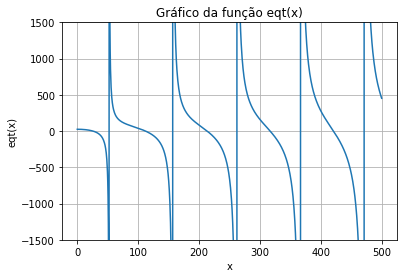

In [234]:
# Definir o intervalo de valores de x
x = np.linspace(0, 500, 1000)

# Calcular os valores de y
y = eqt(x)

# Plotar o gráfico
plt.plot(x, y)
plt.ylim(-1500, 1500)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('eqt(x)')
plt.title('Gráfico da função eqt(x)')
plt.show()




In [13]:
num_raizes = 50

x0 = 1.0

lamb = []

while len(lamb) < num_raizes:
    sol = root(eqt, x0)
    if sol.success:
        x0 = sol.x[0] + 100
        lamb.append(sol.x[0])
    else:
        x0 += 100

# Imprimir as raízes encontradas
print("Raízes encontradas:")
for i, raiz in enumerate(lamb):
    print(f"Raiz {i+1}: {raiz}")



Raízes encontradas:
Raiz 1: -25.711980104975936
Raiz 2: 112.03783267980201
Raiz 3: 213.3281189412306
Raiz 4: 316.7844252099297
Raiz 5: 420.85678405073844
Raiz 6: 525.1843232077958
Raiz 7: 629.6413406687348
Raiz 8: 734.1729115524665
Raiz 9: 838.7512873423628
Raiz 10: 943.3609557269191
Raiz 11: 1047.992571443635
Raiz 12: 1152.6401708467754
Raiz 13: 1257.2997701666623
Raiz 14: 1361.9686072788043
Raiz 15: 1466.6447069798367
Raiz 16: 1571.3266194910334
Raiz 17: 1676.0132567032351
Raiz 18: 1780.7037860525031
Raiz 19: 1885.3975596819753
Raiz 20: 1990.0940659239823
Raiz 21: 2094.792895308678
Raiz 22: 2199.4937162672004
Raiz 23: 2304.196257450589
Raiz 24: 2408.900294654427
Raiz 25: 2513.605641007969
Raiz 26: 2618.312139515017
Raiz 27: 2723.0196573141966
Raiz 28: 2827.728081213413
Raiz 29: 2932.4373141802957
Raiz 30: 3037.147272558112
Raiz 31: 3141.8578838380404
Raiz 32: 3246.5690848622853
Raiz 33: 3351.2808203638606
Raiz 34: 3455.993041771694
Raiz 35: 3560.705706226459
Raiz 36: 3665.41877576502

In [15]:
#Swap para a primeira raiz
lamb_list = lamb
lamb_listaux = abs(lamb_list[0])
lamb_list[0] = lamb_listaux
lamb_list[0]



lamb_list = np.array(lamb)
lamb_listaux = abs(lamb_list[0])
lamb_list[0] = lamb_listaux
lamb_list[0]

for i, raiz in enumerate(lamb_list):
    print(f"Raiz {i+1}: {raiz}")

Raiz 1: 25.711980104975936
Raiz 2: 112.03783267980201
Raiz 3: 213.3281189412306
Raiz 4: 316.7844252099297
Raiz 5: 420.85678405073844
Raiz 6: 525.1843232077958
Raiz 7: 629.6413406687348
Raiz 8: 734.1729115524665
Raiz 9: 838.7512873423628
Raiz 10: 943.3609557269191
Raiz 11: 1047.992571443635
Raiz 12: 1152.6401708467754
Raiz 13: 1257.2997701666623
Raiz 14: 1361.9686072788043
Raiz 15: 1466.6447069798367
Raiz 16: 1571.3266194910334
Raiz 17: 1676.0132567032351
Raiz 18: 1780.7037860525031
Raiz 19: 1885.3975596819753
Raiz 20: 1990.0940659239823
Raiz 21: 2094.792895308678
Raiz 22: 2199.4937162672004
Raiz 23: 2304.196257450589
Raiz 24: 2408.900294654427
Raiz 25: 2513.605641007969
Raiz 26: 2618.312139515017
Raiz 27: 2723.0196573141966
Raiz 28: 2827.728081213413
Raiz 29: 2932.4373141802957
Raiz 30: 3037.147272558112
Raiz 31: 3141.8578838380404
Raiz 32: 3246.5690848622853
Raiz 33: 3351.2808203638606
Raiz 34: 3455.993041771694
Raiz 35: 3560.705706226459
Raiz 36: 3665.41877576502
Raiz 37: 3770.132216

In [29]:
lamb_list

array([  25.7119801 ,  112.03783268,  213.32811894,  316.78442521,
        420.85678405,  525.18432321,  629.64134067,  734.17291155,
        838.75128734,  943.36095573, 1047.99257144, 1152.64017085,
       1257.29977017, 1361.96860728, 1466.64470698, 1571.32661949,
       1676.0132567 , 1780.70378605, 1885.39755968, 1990.09406592,
       2094.79289531, 2199.49371627, 2304.19625745, 2408.90029465,
       2513.60564101, 2618.31213952, 2723.01965731, 2827.72808121,
       2932.43731418, 3037.14727256, 3141.85788384, 3246.56908486,
       3351.28082036, 3455.99304177, 3560.70570623, 3665.41877577,
       3770.13221664, 3874.84599875, 3979.56009517, 4084.27448172,
       4188.98913666, 4293.70404033, 4398.41917499, 4503.13452453,
       4607.85007428, 4712.56581092, 4817.28172224, 4921.99779711,
       5026.71402531, 5131.43039744])

In [32]:
No1_list =[]
for i in lamb_list:
    No1_list.append(No1(i))


No1_list

[40.454282686281196,
 62.70147419092952,
 65.48380858069528,
 66.12099167754512,
 66.35556833848732,
 66.46630538803932,
 66.52704706154513,
 66.5638751318016,
 66.5878602186688,
 66.60434190857875,
 66.6161499864473,
 66.6248967561672,
 66.63155516865106,
 66.63674043730876,
 66.64085694507008,
 66.64417932478634,
 66.64689937429321,
 66.6491543161989,
 66.65104442039147,
 66.65264432973723,
 66.65401053443956,
 66.65518642192733,
 66.65620576094645,
 66.65709515100714,
 66.65787577394056,
 66.65856466586507,
 66.65917565395154,
 66.65972005525686,
 66.66020720425927,
 66.66064485544943,
 66.66103949368416,
 66.6613965756846,
 66.66172071959828,
 66.66201585500762,
 66.66228534254273,
 66.66253206993805,
 66.66275852968924,
 66.66296688223031,
 66.66315900763607,
 66.66333654817153,
 66.66350094349397,
 66.66365345992266,
 66.66379521489196,
 66.6639271974726,
 66.66405028566737,
 66.66416526104805,
 66.66427282119042,
 66.66437359027795,
 66.66446812817621,
 66.66455693822468]

In [42]:
def integrand(x, lamb):
    return Psi(x, lamb)*(T0 - F(x))

# Calcular a integral para cada valor de lamb em lamb_list
cn_list = []
for lamb in lamb_list:
    result, _ = quad(integrand, 0, L, args=(lamb,))
    cn_list.append(No1(lamb) * result)

# Imprimir os valores de cn
print("Valores de cn:")
for i, cn in enumerate(cn_list):
    print(f"cn {i+1}: {cn}")

Valores de cn:
cn 1: -138.2541984234032
cn 2: 0.8091449001358455
cn 3: -0.06542419092646763
cn 4: 0.013636239658577305
cn 5: -0.004398796939636107
cn 6: 0.0018181168448524797
cn 7: -0.0008811340959939091
cn 8: 0.00047703724721899927
cn 9: -0.0002801742335931826
cn 10: 0.00017514480687224335
cn 11: -0.00011502227120854638
cn 12: 7.86173098783176e-05
cn 13: -5.553894918817009e-05
cn 14: 4.033954225463374e-05
cn 15: -3.000105832147416e-05
cn 16: 2.277194658935153e-05
cn 17: -1.7594648969934372e-05
cn 18: 1.380841662295158e-05
cn 19: -1.0987927432088814e-05
cn 20: 8.852123471759188e-06
cn 21: -7.210904674643051e-06
cn 22: 5.932991927868876e-06
cn 23: -4.92601716952013e-06
cn 24: 4.12388411298938e-06
cn 25: -3.478565408624589e-06
cn 26: 2.9546717182356394e-06
cn 27: -2.525790282074767e-06
cn 28: 2.171974403222468e-06
cn 29: -1.8779961553861579e-06
cn 30: 1.6321128323220809e-06
cn 31: -1.4251840410671409e-06
cn 32: 1.2500335880198546e-06
cn 33: -1.1009812254178605e-06
cn 34: 9.73496560162634

In [231]:
# Solução da equação diferencial


def T_s(x,t):
    return sum([cn_list[i] * Gamma(t, lamb_list[i]) * Psi(x,lamb_list[i]) for i in range(len(cn_list))]) + F(x) - 273



x_vals = np.linspace(0, L, 100)
t_vals = np.linspace(0, tf, 100)
T_vals = np.zeros((len(x_vals), len(t_vals)))

for i, x in enumerate(x_vals):
    for j, t in enumerate(t_vals):
        T_vals[i,j] = T_s(x, t)

T_vals -= Tinf

# Impressão da solução
print("Solução da equação:")
print(abs(T_vals))

Solução da equação:
[[272.9999999  272.64927048 272.29854097 ... 241.04659007 240.75355634
  240.46132476]
 [273.         272.64927048 272.29854097 ... 241.04721511 240.75419014
  240.46196731]
 [273.0000001  272.64927048 272.29854097 ... 241.04909043 240.75609174
  240.46389513]
 ...
 [273.00000135 272.6580158  272.32607856 ... 248.31881345 248.10513617
  247.89206453]
 [273.00000125 272.65999963 272.33029444 ... 248.49850801 248.28640586
  248.0749049 ]
 [272.99999683 272.66235475 272.3350467  ... 248.68122062 248.47070673
  248.26078954]]


In [157]:
len(cn_list)

50

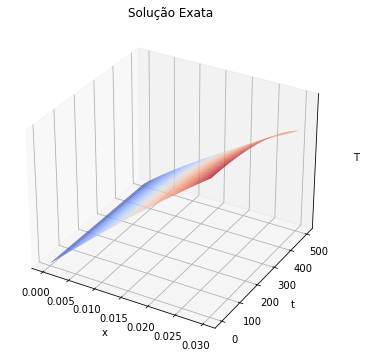

In [233]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x_vals, t_vals)
Z = T_vals

ax.plot_surface(X, T, Z, cmap='coolwarm')

ax.set_title("Solução Exata")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')

ax.set_zticks([])
ax.set_zticklabels([])

plt.show()


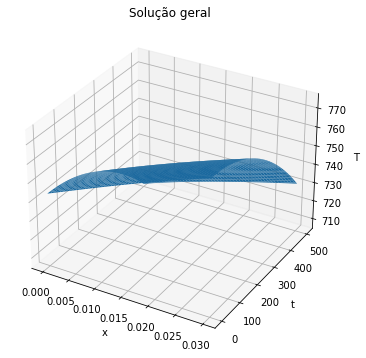

In [225]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x_vals, t_vals)
Z = Theta_vals

ax.plot_surface(X, T, Z)

ax.set_title("Solução geral")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()


In [68]:
cn_list[0]
lamb
Psi(L/2,lamb_list[0])

0.9265429504684666

In [265]:
#Lista de produto para x = L/4, t = 5
prod_listL45 = []
for i in range(len(cn_list)):
    result1 = cn_list[i]*Psi((L/4),lamb_list[i])*Gamma(5, lamb_list[i])
    prod_listL45.append(result1)    


    
#Lista de produto para x = L/4, t = 50
prod_listL450 = []
for i in range(len(cn_list)):
    result2 = cn_list[i]*Psi((L/4),lamb_list[i])*Gamma(50, lamb_list[i])
    prod_listL450.append(result2)    


#Lista de produto para x = L/4, t = 500
prod_listL4500 = []
for i in range(len(cn_list)):
    result3 = cn_list[i]*Psi((L/4),lamb_list[i])*Gamma(500, lamb_list[i])
    prod_listL4500.append(result3)


In [264]:
print("Os valores para x = L/4 e t = 5s")    
for i, prod in enumerate(prod_listL45):
    print(f"prod1 {i+1}: {abs(prod)}")

Os valores para x = L/4 e t = 5s
prod1 1: 135.31824840020727
prod1 2: 0.5123908950276391
prod1 3: 0.001578269717159842
prod1 4: 0.006470986045640792
prod1 5: 0.0021026937515260078
prod1 6: 0.00040250388377624166
prod1 7: 1.6757013770447063e-06
prod1 8: 3.600235077901789e-05
prod1 9: 1.4941139034853907e-05
prod1 10: 3.0172038457163425e-06
prod1 11: 7.059917598077499e-09
prod1 12: 2.2039434979135292e-07
prod1 13: 7.656572496019528e-08
prod1 14: 1.2489778982730868e-08
prod1 15: 1.637568621329006e-11
prod1 16: 5.504010242630777e-10
prod1 17: 1.4530668918754194e-10
prod1 18: 1.778908534897949e-11
prod1 19: 1.3454857866328927e-14
prod1 20: 4.277348676486497e-13
prod1 21: 8.267085836371904e-14
prod1 22: 7.36681516184044e-15
prod1 23: 3.298399657750028e-18
prod1 24: 9.234160204703577e-17
prod1 25: 1.2829525157898891e-17
prod1 26: 8.192348305773953e-19
prod1 27: 2.21625988249145e-22
prod1 28: 5.2235956467274524e-21
prod1 29: 5.163486572535433e-22
prod1 30: 2.3414136154784934e-23
prod1 31: 3.889

In [266]:
print("Os valores para x = L/4 e t = 50s")    
for i, prod in enumerate(prod_listL450):
    print(f"prod1 {i+1}: {abs(prod)}")

Os valores para x = L/4 e t = 50s
prod1 1: 132.00475275572717
prod1 2: 0.3200156665017279
prod1 3: 0.00028643200347180134
prod1 4: 0.00015018529421662667
prod1 5: 2.7427424526590923e-06
prod1 6: 1.2965131019324528e-08
prod1 7: 5.856307530230136e-13
prod1 8: 5.997814048168729e-14
prod1 9: 5.213048788037348e-17
prod1 10: 9.686526883318457e-21
prod1 11: 9.162773678044705e-27
prod1 12: 5.080421198849013e-29
prod1 13: 1.3772517821276931e-33
prod1 14: 7.702308951788622e-39
prod1 15: 1.5211090841298476e-46
prod1 16: 3.383312432763461e-50
prod1 17: 2.596915317017378e-56
prod1 18: 4.061087589651581e-63
prod1 19: 1.723818854798762e-72
prod1 20: 1.3511953298171738e-77
prod1 21: 2.8290073430993203e-85
prod1 22: 1.199794071152897e-93
prod1 23: 1.1232661696585725e-104
prod1 24: 2.8889259958783343e-111
prod1 25: 1.6200049568497903e-120
prod1 26: 1.8343746992611446e-130
prod1 27: 3.8661735080889587e-143
prod1 28: 3.119021332380255e-151
prod1 29: 4.636466300606884e-162
prod1 30: 1.389071425901795e-173


In [256]:
print("Os valores para x = L/4 e t = 500s")    
for i, prod in enumerate(prod_listL4500):
    print(f"prod1 {i+1}: {abs(prod)}")

Os valores para x = L/4 e t = 500s
prod1 1: 103.02000650895243
prod1 2: 0.0028898120649132005
prod1 3: 1.1102600461016116e-11
prod1 4: 6.810780337430534e-21
prod1 5: 3.9108852547021435e-35
prod1 6: 1.5589969170921982e-53
prod1 7: 1.5918287899482634e-77
prod1 8: 9.876757202180772e-102
prod1 9: 1.3937106310602492e-131
prod1 10: 1.1266848207288662e-165
prod1 11: 1.2425109771521436e-205
prod1 12: 2.152248187459979e-245
prod1 13: 4.884305086793656e-291
prod1 14: 0.0
prod1 15: 0.0
prod1 16: 0.0
prod1 17: 0.0
prod1 18: 0.0
prod1 19: 0.0
prod1 20: 0.0
prod1 21: 0.0
prod1 22: 0.0
prod1 23: 0.0
prod1 24: 0.0
prod1 25: 0.0
prod1 26: 0.0
prod1 27: 0.0
prod1 28: 0.0
prod1 29: 0.0
prod1 30: 0.0
prod1 31: 0.0
prod1 32: 0.0
prod1 33: 0.0
prod1 34: 0.0
prod1 35: 0.0
prod1 36: 0.0
prod1 37: 0.0
prod1 38: 0.0
prod1 39: 0.0
prod1 40: 0.0
prod1 41: 0.0
prod1 42: 0.0
prod1 43: 0.0
prod1 44: 0.0
prod1 45: 0.0
prod1 46: 0.0
prod1 47: 0.0
prod1 48: 0.0
prod1 49: 0.0
prod1 50: 0.0


In [85]:
#---------------------------------LISTAS PARA X = L/2 VARIANDO t!!!--------------------------------

#Lista de produto para x = L/2, t = 5
prod_listL25 = []
for i in range(len(cn_list)):
    result1 = cn_list[i]*Psi((L/2),lamb_list[i])*Gamma(5, lamb_list[i])
    prod_listL25.append(result1)    


    
#Lista de produto para x = L/2, t = 50
prod_listL250 = []
for i in range(len(cn_list)):
    result2 = cn_list[i]*Psi((L/2),lamb_list[i])*Gamma(50, lamb_list[i])
    prod_listL250.append(result2)    


#Lista de produto para x = L/2, t = 500
prod_listL2500 = []
for i in range(len(cn_list)):
    result3 = cn_list[i]*Psi((L/2),lamb_list[i])*Gamma(500, lamb_list[i])
    prod_listL2500.append(result3)

In [257]:
print("Os valores para x = L/2 e t = 5s")    
for i, prod in enumerate(prod_listL25):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = L/2 e t = 5s
prod2 1: 127.74607744913982
prod2 2: 0.08412548248603643
prod2 3: 0.05403162984511584
prod2 4: 0.0003533749214086183
prod2 5: 0.0021019997722188013
prod2 6: 1.3700645898221913e-05
prod2 7: 0.0001688727343985285
prod2 8: 8.592199086460649e-07
prod2 9: 1.493989534100154e-05
prod2 10: 5.690274263845349e-08
prod2 11: 1.1839459360966248e-06
prod2 12: 3.3613467605172292e-09
prod2 13: 7.656288773071829e-08
prod2 14: 1.62839478702945e-10
prod2 15: 3.843014388558725e-09
prod2 16: 6.167031030046517e-12
prod2 17: 1.4530365866099882e-10
prod2 18: 1.7720844694640047e-13
prod2 19: 4.058997091408281e-12
prod2 20: 3.787396567496898e-15
prod2 21: 8.266975458848998e-14
prod2 22: 5.937430712487819e-17
prod2 23: 1.216056936202038e-15
prod2 24: 6.758685109401965e-19
prod2 25: 1.2829406187429145e-17
prod2 26: 5.54416664527863e-21
prod2 27: 9.656048797957307e-20
prod2 28: 3.258265200331214e-23
prod2 29: 5.1634513909024915e-22
prod2 30: 1.3655946275817664e-25
prod2 31: 1.95527

In [258]:
print("Os valores para x = L/2 e t = 50s")    
for i, prod in enumerate(prod_listL250):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = L/2 e t = 50s
prod2 1: 124.61799918747579
prod2 2: 0.0525408874529205
prod2 3: 0.00980592088862585
prod2 4: 8.201488330558626e-06
prod2 5: 2.741837229772611e-06
prod2 6: 4.4131417429643e-10
prod2 7: 5.901831195322047e-11
prod2 8: 1.4314179843909071e-15
prod2 9: 5.212614856145366e-17
prod2 10: 1.8268236900349965e-22
prod2 11: 1.5365942319848403e-24
prod2 12: 7.748409773200183e-31
prod2 13: 1.3772007465062643e-33
prod2 14: 1.0042131059744731e-40
prod2 15: 3.56970939766434e-44
prod2 16: 3.790870989953227e-52
prod2 17: 2.5968611555686348e-56
prod2 18: 4.045508864325857e-65
prod2 19: 5.2003341746574767e-70
prod2 20: 1.1964216483681741e-79
prod2 21: 2.8289695717698586e-85
prod2 22: 9.66997815232859e-96
prod2 23: 4.1412677617914134e-102
prod2 24: 2.1144685253090556e-113
prod2 25: 1.6199899342555524e-120
prod2 26: 1.24141194233878e-132
prod2 27: 1.6844576915550786e-140
prod2 28: 1.945517868089978e-153
prod2 29: 4.636434709848731e-162
prod2 30: 8.10155225885274e-176
prod2 31

In [259]:
print("Os valores para x = L/2 e t = 500s")    
for i, prod in enumerate(prod_listL2500):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = L/2 e t = 500s
prod2 1: 97.25518831267526
prod2 2: 0.0004744558043750537
prod2 3: 3.800944742875531e-10
prod2 4: 3.719307922309926e-22
prod2 5: 3.9095944944867516e-35
prod2 6: 5.3065984151779736e-55
prod2 7: 1.604202778223845e-75
prod2 8: 2.357153418415925e-103
prod2 9: 1.3935946191993205e-131
prod2 10: 2.1248632729806656e-167
prod2 11: 2.0836869574162108e-203
prod2 12: 3.282503603017285e-247
prod2 13: 4.884124093348167e-291
prod2 14: 0.0
prod2 15: 0.0
prod2 16: 0.0
prod2 17: 0.0
prod2 18: 0.0
prod2 19: 0.0
prod2 20: 0.0
prod2 21: 0.0
prod2 22: 0.0
prod2 23: 0.0
prod2 24: 0.0
prod2 25: 0.0
prod2 26: 0.0
prod2 27: 0.0
prod2 28: 0.0
prod2 29: 0.0
prod2 30: 0.0
prod2 31: 0.0
prod2 32: 0.0
prod2 33: 0.0
prod2 34: 0.0
prod2 35: 0.0
prod2 36: 0.0
prod2 37: 0.0
prod2 38: 0.0
prod2 39: 0.0
prod2 40: 0.0
prod2 41: 0.0
prod2 42: 0.0
prod2 43: 0.0
prod2 44: 0.0
prod2 45: 0.0
prod2 46: 0.0
prod2 47: 0.0
prod2 48: 0.0
prod2 49: 0.0
prod2 50: 0.0


In [102]:
#---------------------------------LISTAS PARA X = 3L/4 VARIANDO t!!!--------------------------------

#Lista de produto para x = L/2, t = 5
prod_list3L45 = []
for i in range(len(cn_list)):
    result1 = cn_list[i]*Psi((3*L/2),lamb_list[i])*Gamma(5, lamb_list[i])
    prod_list3L45.append(result1)    


    
#Lista de produto para x = L/2, t = 50
prod_list3L450 = []
for i in range(len(cn_list)):
    result2 = cn_list[i]*Psi((3*L/2),lamb_list[i])*Gamma(50, lamb_list[i])
    prod_list3L450.append(result2)    


#Lista de produto para x = L/2, t = 500
prod_list3L4500 = []
for i in range(len(cn_list)):
    result3 = cn_list[i]*Psi((3*L/2),lamb_list[i])*Gamma(500, lamb_list[i])
    prod_list3L4500.append(result3)

In [260]:
print("Os valores para x = 3L/4 e t = 5s")    
for i, prod in enumerate(prod_list3L45):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = 3L/4 e t = 5s
prod2 1: 55.4325176589721
prod2 2: 0.24833795739697812
prod2 3: 0.05329713884696424
prod2 4: 0.0010579341532441127
prod2 5: 0.002094602075716717
prod2 6: 4.1070944935666624e-05
prod2 7: 0.00016860682116250428
prod2 8: 2.5766642972522843e-06
prod2 9: 1.4926631420295302e-05
prod2 10: 1.7066828601344277e-07
prod2 11: 1.183272478631564e-06
prod2 12: 1.0082459569961164e-08
prod2 13: 7.65326261301887e-08
prod2 14: 4.884635836883951e-10
prod2 15: 3.841898020089508e-09
prod2 16: 1.8499532313440143e-11
prod2 17: 1.4527133435543621e-10
prod2 18: 5.315904174102328e-13
prod2 19: 4.05828352300416e-12
prod2 20: 1.1361592086521228e-14
prod2 21: 8.265798129170005e-14
prod2 22: 1.781152514510223e-16
prod2 23: 1.2159137976394067e-15
prod2 24: 2.027532743192534e-18
prod2 25: 1.2828137191966939e-17
prod2 26: 1.6631994525925397e-20
prod2 27: 9.655234936536798e-20
prod2 28: 9.774540938077268e-23
prod2 29: 5.163076125122886e-22
prod2 30: 4.0966913600991944e-25
prod2 31: 1.95

In [261]:
print("Os valores para x = 3L/4 e t = 50s")    
for i, prod in enumerate(prod_list3L450):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = 3L/4 e t = 50s
prod2 1: 54.07515892874123
prod2 2: 0.15510040815573983
prod2 3: 0.009672621918338845
prod2 4: 2.4553623040775862e-05
prod2 5: 2.732187714129437e-06
prod2 6: 1.3229442090909135e-09
prod2 7: 5.892537954247895e-11
prod2 8: 4.292595618084285e-15
prod2 9: 5.207986998416382e-17
prod2 10: 5.4791887626226955e-22
prod2 11: 1.5357201795262362e-24
prod2 12: 2.3241585541671868e-30
prod2 13: 1.3766564057678845e-33
prod2 14: 3.0123010490961116e-40
prod2 15: 3.568672422359828e-44
prod2 16: 1.1371653561177813e-51
prod2 17: 2.5962834568770133e-56
prod2 18: 1.2135729322622237e-64
prod2 19: 5.199419960117692e-70
prod2 20: 3.5890761608907394e-79
prod2 21: 2.828566688048431e-85
prod2 22: 2.900868529725066e-95
prod2 23: 4.1407803050800966e-102
prod2 24: 6.343177852079998e-113
prod2 25: 1.619829696139668e-120
prod2 26: 3.7241226590798754e-132
prod2 27: 1.6843157168034673e-140
prod2 28: 5.836401544439415e-153
prod2 29: 4.636097746226096e-162
prod2 30: 2.4304107874975418e-17

In [262]:
print("Os valores para x = 3L/4 e t = 500s")    
for i, prod in enumerate(prod_list3L4500):
    print(f"prod2 {i+1}: {abs(prod)}")

Os valores para x = 3L/4 e t = 500s
prod2 1: 42.20168674623621
prod2 2: 0.0014005909012551377
prod2 3: 3.749275753690559e-10
prod2 4: 1.1134867357757855e-21
prod2 5: 3.8958352192010535e-35
prod2 6: 1.5907790984785304e-54
prod2 7: 1.6016767413623238e-75
prod2 8: 7.068729431501523e-103
prod2 9: 1.3923573596266268e-131
prod2 10: 6.373098307698379e-167
prod2 11: 2.0825017052070193e-203
prod2 12: 9.845967174353951e-247
prod2 13: 4.88219363569916e-291
prod2 14: 0.0
prod2 15: 0.0
prod2 16: 0.0
prod2 17: 0.0
prod2 18: 0.0
prod2 19: 0.0
prod2 20: 0.0
prod2 21: 0.0
prod2 22: 0.0
prod2 23: 0.0
prod2 24: 0.0
prod2 25: 0.0
prod2 26: 0.0
prod2 27: 0.0
prod2 28: 0.0
prod2 29: 0.0
prod2 30: 0.0
prod2 31: 0.0
prod2 32: 0.0
prod2 33: 0.0
prod2 34: 0.0
prod2 35: 0.0
prod2 36: 0.0
prod2 37: 0.0
prod2 38: 0.0
prod2 39: 0.0
prod2 40: 0.0
prod2 41: 0.0
prod2 42: 0.0
prod2 43: 0.0
prod2 44: 0.0
prod2 45: 0.0
prod2 46: 0.0
prod2 47: 0.0
prod2 48: 0.0
prod2 49: 0.0
prod2 50: 0.0
